[64, 256, 128, 512]
[226.049, 61.51, 115.086, 34.68]
----
[64, 128, 256, 512]
[1.0, 1.9641746172427577, 3.6749959356202244, 6.518137254901961]
[1.0, 2.0, 4.0, 8.0]


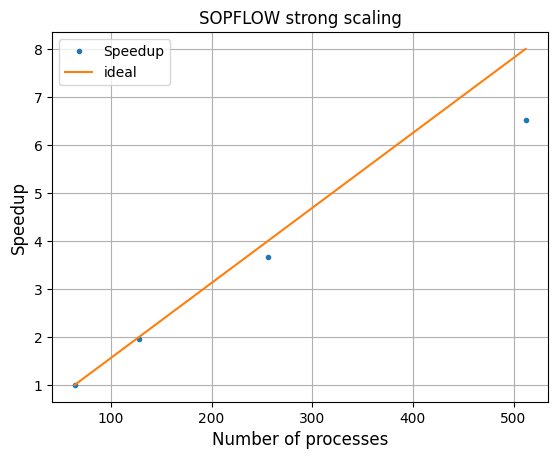

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

def processValues(x, p_time):
    mn_idx = x.index(min(x))
    y1 = []
    y2 = []
    for i, value in enumerate(p_time):
        y1.append(p_time[mn_idx]/value)
        y2.append(x[i]/x[mn_idx])

    Z1 = [x for _,x in sorted(zip(x,y1))]
    Z2 = [x for _,x in sorted(zip(x,y2))]
    x.sort()
    return x, Z1, Z2

def plotWithValues(x, Z1, Z2, title):
    plt.plot(x, Z1, '.', label='Speedup')
    plt.plot(x, Z2, '-' , label='ideal')

    plt.xlabel("Number of processes", fontsize=12)
    plt.ylabel("Speedup", fontsize=12)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.grid()
#     plt.show()
    return plt

in_file = 'SOPFLOW_frontier_ACTIVSg2000_kpp2.json'
profiledData = json.load(open(in_file, 'r'))

x = []
p_time = []

for e_data in profiledData:
    if e_data['sopflow_Nc'] == 100:
        x.append(e_data['total_ranks'])
        p_time.append(e_data['petsc_solve_time'])

print(x)
print(p_time)
x, Z1, Z2 = processValues(x, p_time)
print("----")
print(x)
print(Z1)
print(Z2)

plt = plotWithValues(x, Z1, Z2, 'SOPFLOW strong scaling')
plt.show()

[64, 512, 128, 256]
[226.049, 224.647, 223.64600000000002, 292.11699999999996]
----
[64, 128, 256, 512]
[1.0, 1.0107446589699793, 0.7738303487985979, 1.006240902393533]
[1, 1, 1, 1]


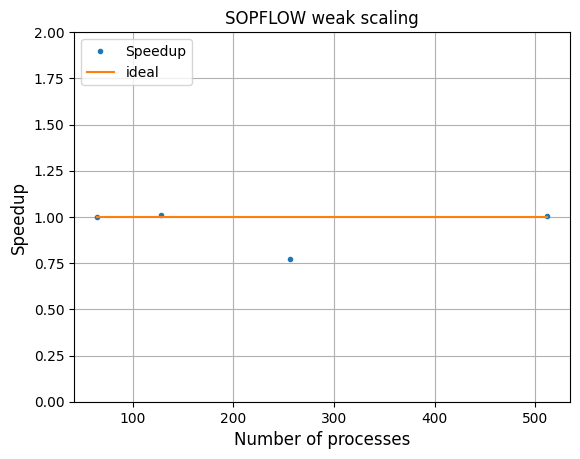

In [3]:
import matplotlib.pyplot as plt

x = []
p_time = []

for e_data in profiledData:
    if e_data['sopflow_Nc'] != 100:
        x.append(e_data['total_ranks'])
        p_time.append(e_data['petsc_solve_time'])
    else:
        if e_data['total_ranks'] == 64:
            x.append(e_data['total_ranks'])
            p_time.append(e_data['petsc_solve_time'])

print(x)
print(p_time)
x, Z1, Z2 = processValues(x, p_time)
print("----")
print(x)
for i, value in enumerate(Z2):
    Z2[i] = 1
print(Z1)
print(Z2)
plt = plotWithValues(x, Z1, Z2, 'SOPFLOW weak scaling')
ax = plt.gca()
ax.set_ylim([0, 2])
plt.show()